# Achieving High Accuracy in Predicting Passenger Transportation with Ensemble Models

This data is sourced from the Kaggle Competition: [Spaceship Titanic](https://www.kaggle.com/c/spaceship-titanic/overview)

# Context

"Welcome to the year 2912, where data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system."

**Help save them and change history!**

# Dataset Description

In this competition the task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
        
**Variables**

*PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.*

*HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.*

*CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.*

*Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.*

*Destination - The planet the passenger will be debarking to.*

*Age - The age of the passenger.*

*VIP - Whether the passenger has paid for special VIP service during the voyage.*

*RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.*

*Name - The first and last names of the passenger.*

*Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.*
    
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.*
    
**sample_submission.csv** - A submission file in the correct format.
            
*PassengerId - Id for each passenger in the test set.*
*Transported - The target. For each passenger, predict either True or False.*

# Development

In order to achieve great prediction accuracy, different models were tested and tuned. These are the model that I used:

-  **AdaBoost Model**: The AdaBoost algorithm achieved an accuracy of 77.8%, setting a strong foundation for my models. It demonstrated competitive precision (76.4%), recall (81.3%), and F1 score (78.8%).

-  **XGBoost Model**: Building upon the AdaBoost results, I explored the XGBoost algorithm, which significantly improved the accuracy to 79.8%. The XGBoost model exhibited impressive precision (80.1%), recall (79.8%), and F1 score (79.9%).

-  **Hyperparameter Tuning - Random Forest**: By employing advanced hyperparameter tuning techniques, I fine-tuned the Random Forest model to achieve an outstanding accuracy of 80.5%. The optimized model showcased exceptional precision (80.4%), recall (81.1%), and F1 score (80.8%).

-  **Hyperparameter Tuning - XGBoost**: Further enhancing my models, I utilized GridSearchCV to fine-tune the XGBoost model, resulting in an accuracy of 80.3%. The tuned model displayed consistent performance with competitive precision (80.1%), recall (81.1%), and F1 score (80.6%).

-  **Stacking the Models**: Leveraging the power of ensemble learning, I combined the Random Forest and XGBoost models using a VotingClassifier. This ensemble achieved an impressive accuracy of 80.5%. It showcased exceptional precision (82.8%) and commendable recall (77.6%), resulting in an impressive F1 score of 80.1%.

These model developed allowed me to achieve an overall accuracy of 0.79658 of the Kaggle entry, which is in the top 42% of the competition, with a position of 1,048 out of 2,529 participants.

In [ ]:
# Install Graphiz, Pydot, Shap, Keras, Tensorflow, and XGBoost
# !pip install graphviz
# !pip install pydot
# !pip install shap
# !pip install xgboost
# !pip3 install tensorflow==2.11.0 --ignore-installed
# !pip install keras

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydot
import plotly.graph_objects as go
import shap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from io import StringIO  
from plotly.subplots import make_subplots
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Read the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## Data Preparation

In [3]:
# Sample the train Data
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [43]:
# Sample the test Data
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [44]:
# Check the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Check the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
# Describe the train data
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [47]:
# Describe the test data
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [48]:
# Check for null values in train data 
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [49]:
# Check for null values in test data
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### Data Preparation - Filling in missing values

In [6]:
# Filling Numerics Variables with mean

# Filling the missing values in Age with the mean of the Age
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

# Filling the missing values in Amenities variables of space titanic (RoomService, Foodcout, ShoppingMall, Spa, VRDeck)
train['RoomService'].fillna(train['RoomService'].mean(), inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].mean(), inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(), inplace=True)
train['Spa'].fillna(train['Spa'].mean(), inplace=True)
train['VRDeck'].fillna(train['VRDeck'].mean(), inplace=True)

test['RoomService'].fillna(test['RoomService'].mean(), inplace=True)
test['FoodCourt'].fillna(test['FoodCourt'].mean(), inplace=True)
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(), inplace=True)
test['Spa'].fillna(test['Spa'].mean(), inplace=True)
test['VRDeck'].fillna(test['VRDeck'].mean(), inplace=True)

In [7]:
# Filling Category Variables with mode

# Filling HomePlanet, CryoSleep, Destination, VIP
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)

test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0], inplace=True)

In [8]:
# Filling the String with Default Values

# Filling the Cabin with default value
train['Cabin'].fillna('Z/9999/Z', inplace=True)

test['Cabin'].fillna('Z/9999/Z', inplace=True)

# Filling the null Name with default value
train['Name'].fillna('Nombre Apellido', inplace=True)

test['Name'].fillna('Nombre Apellido', inplace=True)

#Filling the null value of PassengerId with default value
train['PassengerId'].fillna('999999', inplace=True)

test['PassengerId'].fillna('999999', inplace=True)

### Data Preparation - Generating new features from existing features

In [9]:
# Separating the Cabin into Deck, CabinNumber and Side
train['Deck'] = train['Cabin'].str.split('/').str[0]
train['CabinNumber'] = train['Cabin'].str.split('/').str[1]
train['Side'] = train['Cabin'].str.split('/').str[2]

# Turn Cabin number into numeric
train['CabinNumber'] = pd.to_numeric(train['CabinNumber'], errors='coerce')

# Dropping the Cabin column in train data
train.drop('Cabin', axis=1, inplace=True)

# Separating the Cabin into Deck, CabinNumber and Side
test['Deck'] = test['Cabin'].str.split('/').str[0]
test['CabinNumber'] = test['Cabin'].str.split('/').str[1]
test['Side'] = test['Cabin'].str.split('/').str[2]

# Turn Cabin number into numeric
test['CabinNumber'] = pd.to_numeric(test['CabinNumber'], errors='coerce')

# Dropping the Cabin column in test data
test.drop('Cabin', axis=1, inplace=True)

In [10]:
# Transform Side into either "Port" or "Starboard"
train['Side'] = train['Side'].map({'P': 'Port', 'S': 'Starboard'})

test['Side'] = test['Side'].map({'P': 'Port', 'S': 'Starboard'})

### Data Preparation - Getting the Dummy Variables

In [11]:
# Define the dummy variables
dummy_variables = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Create the dummy variables
train = pd.get_dummies(train, columns=dummy_variables, drop_first=False)
test = pd.get_dummies(test, columns=dummy_variables, drop_first=False)

### Data Preparation - Dealing with the Name Variable

In [12]:
# Embedding the name based on length and number of vowels
def name_embedding(name):
    name = name.split(' ')
    name = name[0] + name[1]
    length = len(name)
    vowels = sum(name.count(w) for w in 'aeiou')
    return length, vowels

# Create the new variables
train['NameLength'], train['NameVowels'] = zip(*train['Name'].apply(name_embedding))
test['NameLength'], test['NameVowels'] = zip(*test['Name'].apply(name_embedding))

# Dropping the Name column
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

### Data Preparation - Dealing with the PassengerId Variable

In [13]:
# Transform PassengerId into String
train['PassengerId'] = train['PassengerId'].astype(str)
test['PassengerId'] = test['PassengerId'].astype(str)

# Drop the _ and convert PassengerId to int
train['PassengerId'] = train['PassengerId'].str.replace('_', '')
test['PassengerId'] = test['PassengerId'].str.replace('_', '')

# Convert PassengerId to int
train['PassengerId'] = train['PassengerId'].astype(int)
test['PassengerId'] = test['PassengerId'].astype(int)

### Data Preparation - Scaling the numerical variables

In [14]:
# Scaling the numeric variables

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the train data
scaler.fit(train[['Age', 'NameLength', 'NameVowels', 'PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Transform the train data
train[['Age', 'NameLength', 'NameVowels', 'PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.transform(train[['Age', 'NameLength', 'NameVowels', 'PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Transform the test data
test[['Age', 'NameLength', 'NameVowels', 'PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.transform(test[['Age', 'NameLength', 'NameVowels', 'PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

### Data Preparation - Checking for Correlation

<AxesSubplot:>

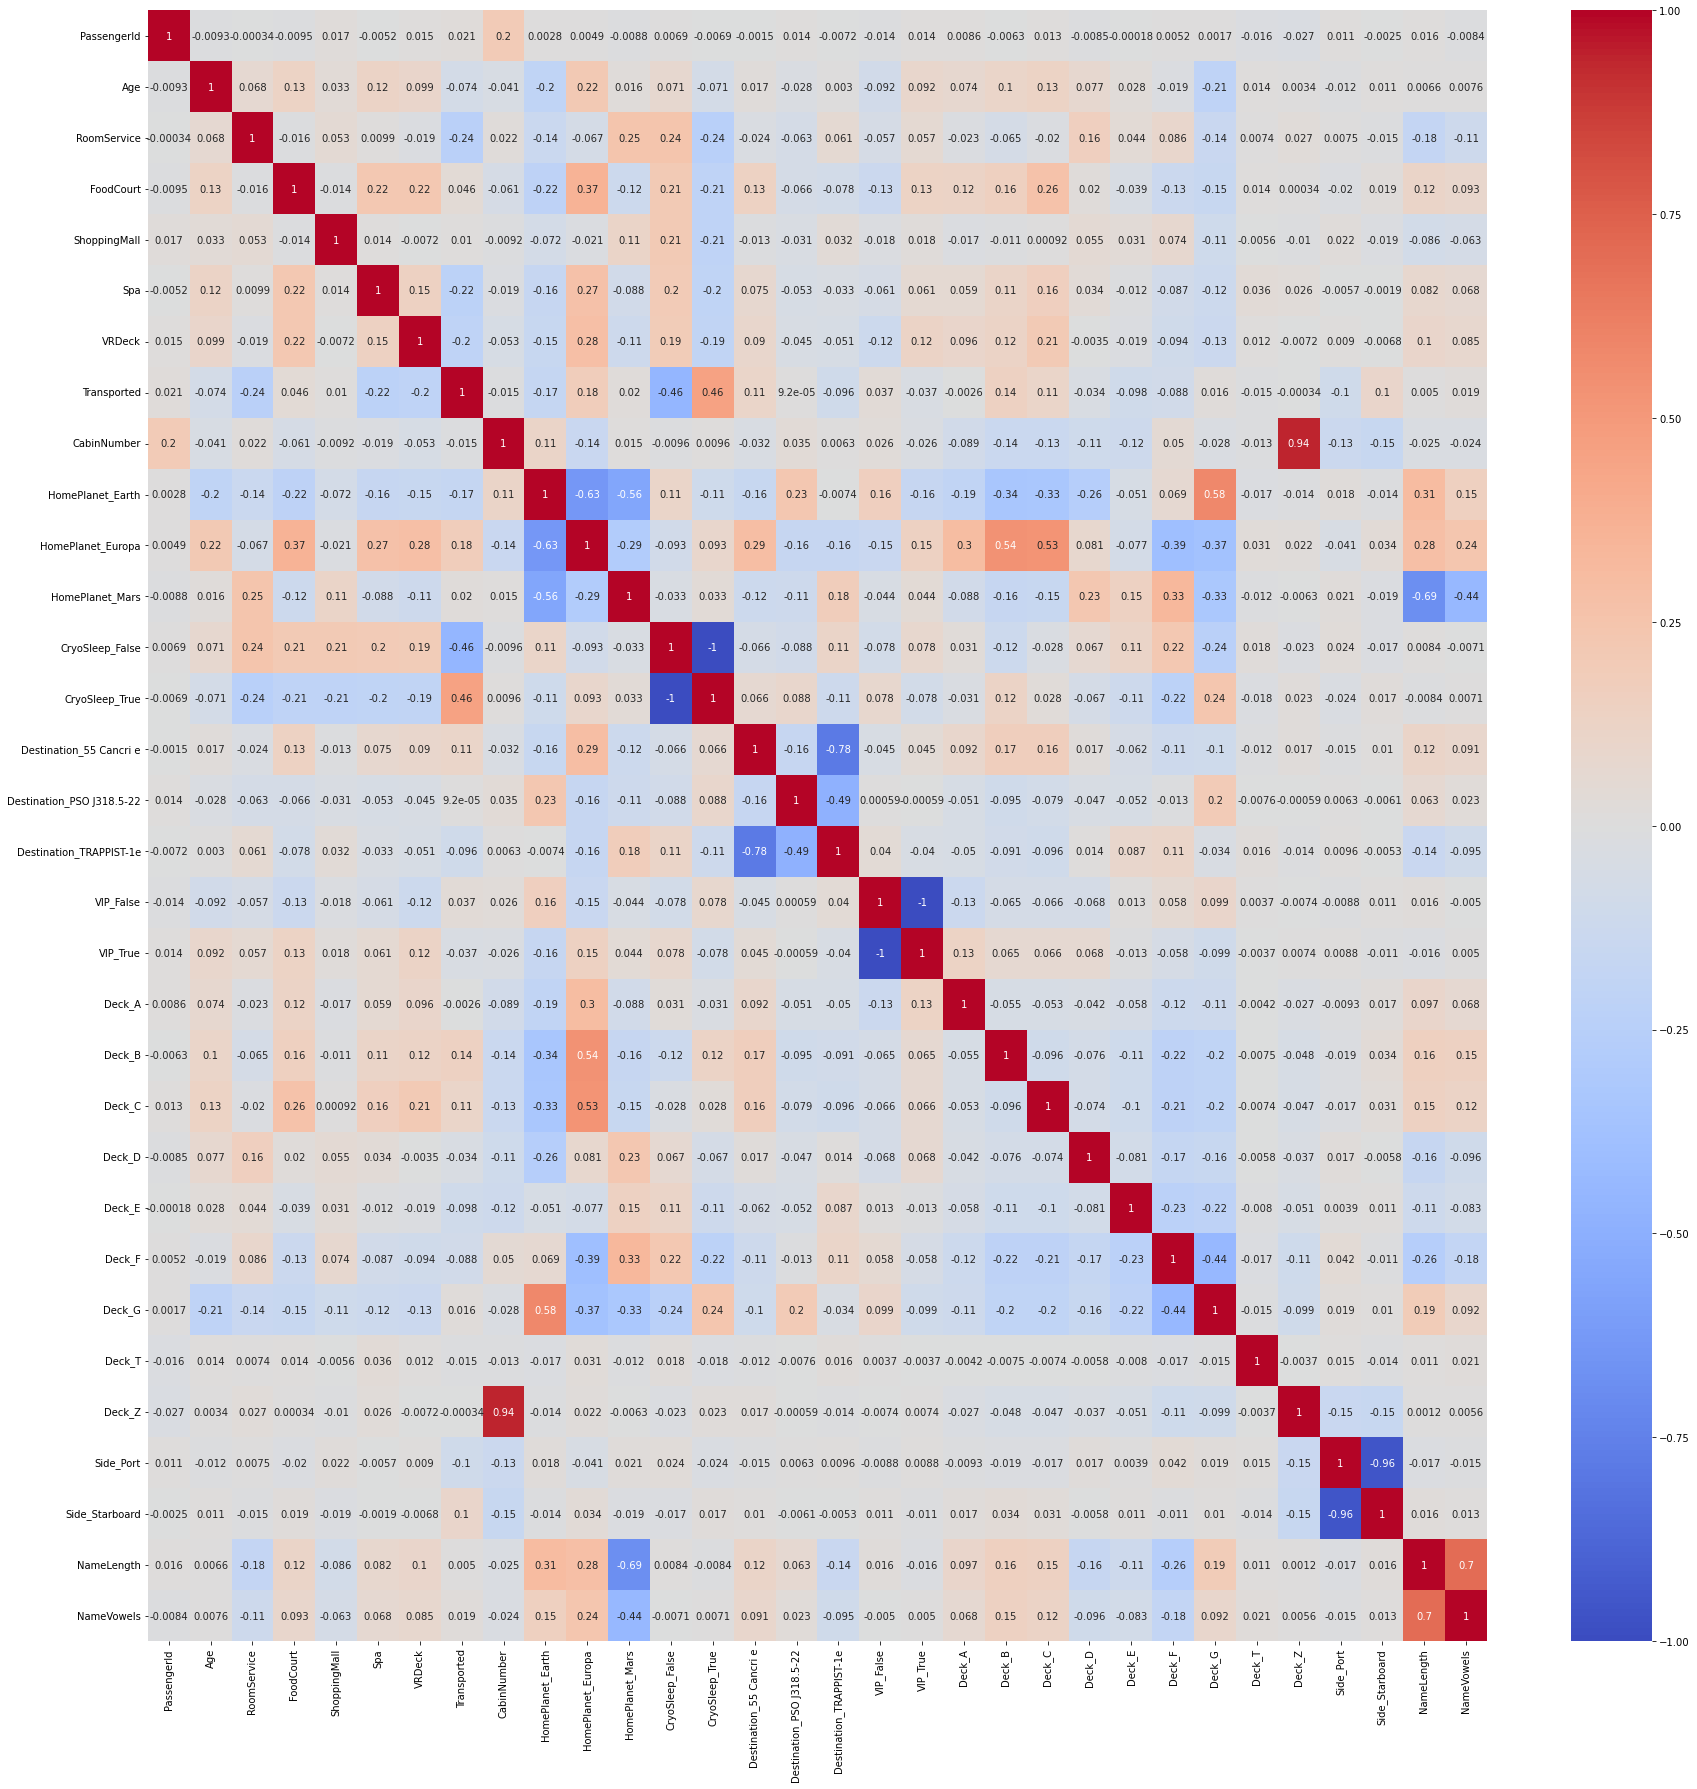

In [24]:
# Check for correlation between variables above 0.8 ignore the id matrix
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

# Plot the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

### Data Preparation - Splitting the dataset into the Training set and Test set

In [25]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train.drop('Transported', axis=1), train['Transported'], test_size=0.3, random_state=42)

# Generate a Logistic Regression Model


In [209]:
# Create the model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

In [210]:
# Check the Logistic Model Performance
print('Logistic Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Logistic Model Accuracy:  0.7845092024539877
Precision:  0.766737138830162
Recall:  0.8248673237300985
F1 Score:  0.7947406866325785


In [63]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 958  331]
 [ 231 1088]]


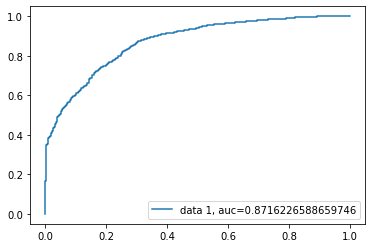

In [64]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [211]:
# Save the Performance Metrics in a DataFrame for Comparison purposes
performance = pd.DataFrame({'Model': 'Logistic Regression', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, index=[0])

In [212]:
performance

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.784509,0.766737,0.824867,0.794741


# Generate a Random Forest Model

In [26]:
np.random.seed(42)

# Create the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

In [27]:
# Check the Random Forest Model Accuracy
print('Random Forest Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Random Forest Model Accuracy:  0.8002300613496932
Precision:  0.8151658767772512
Recall:  0.7824109173616376
F1 Score:  0.7984526112185686


In [28]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1055  234]
 [ 287 1032]]


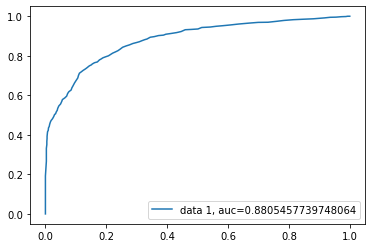

In [151]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)  
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))    
plt.legend(loc=4)
plt.show();    

In [215]:
# Save the Performance Metrics in the Performance DataFrame (or replace the Logistic Regression Metrics)
performance = pd.DataFrame({'Model': 'Random Forest', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, index=[1])

# Generate a Boosted Tree Model

In [29]:
np.random.seed(42)

# Create the model
model = GradientBoostingClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

In [30]:
# Check the Gradient Boosting Model Accuracy
print('Gradient Boosting Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Gradient Boosting Model Accuracy:  0.7960122699386503
Precision:  0.7792760823278921
Recall:  0.8324488248673237
F1 Score:  0.8049853372434017


In [74]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 978  311]
 [ 221 1098]]


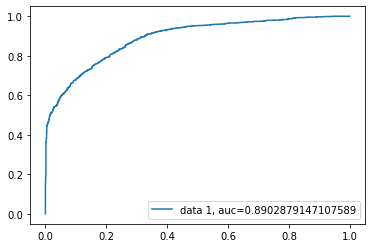

In [31]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [218]:
# Save the Accuracy Score in a table
performance = performance.append({'Model': 'Gradient Boosting', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Generate a Neural Network Model

In [78]:
X_train.shape

(6085, 31)

In [79]:
# Calculate the number of input features for the model
n_features = X_train.shape[1]
n_features

31

In [230]:
np.random.seed(42)

# Create the model
model = Sequential()

# Add the input layer
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))

# Add the hidden layer
model.add(Dense(20, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=1, verbose=1)

Epoch 1/150
6085/6085 [==============================] - 6s 845us/step - loss: 1.7687 - accuracy: 0.6233
Epoch 2/150
6085/6085 [==============================] - 5s 858us/step - loss: 0.9375 - accuracy: 0.6952
Epoch 3/150
6085/6085 [==============================] - 6s 981us/step - loss: 0.6590 - accuracy: 0.7024
Epoch 4/150
6085/6085 [==============================] - 5s 876us/step - loss: 0.5850 - accuracy: 0.6713
Epoch 5/150
6085/6085 [==============================] - 5s 810us/step - loss: 0.5508 - accuracy: 0.6920
Epoch 6/150
6085/6085 [==============================] - 5s 823us/step - loss: 0.5569 - accuracy: 0.6878
Epoch 7/150
6085/6085 [==============================] - 5s 787us/step - loss: 0.5263 - accuracy: 0.7127
Epoch 8/150
6085/6085 [==============================] - 5s 849us/step - loss: 0.5343 - accuracy: 0.7025
Epoch 9/150
6085/6085 [==============================] - 5s 752us/step - loss: 0.5199 - accuracy: 0.7182
Epoch 10/150
6085/6085 [==============================]

In [231]:
# Predict the model
y_pred = model.predict(X_test)

82/82 [==============================] - 0s 861us/step


In [232]:
# Check the Neural Network Model Performance
print('Neural Netwrok Model Accuracy:', accuracy_score(y_test, y_pred.round()))
print('Precision: ', precision_score(y_test, y_pred.round()))
print('Recall: ', recall_score(y_test, y_pred.round()))
print('F1 Score: ', f1_score(y_test, y_pred.round()))

Neural Netwrok Model Accuracy: 0.7883435582822086
Precision:  0.7721788502484032
Recall:  0.8248673237300985
F1 Score:  0.7976539589442816


In [233]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[ 968  321]
 [ 231 1088]]


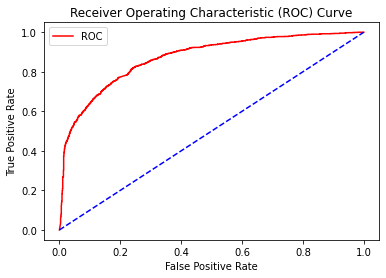

In [234]:
# Neural Network ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend();

In [235]:
# Add the Performance Metrics to the Performance DataFrame (or replace the Neural Network Metrics)
performance = performance.append({'Model': 'Neural Network', 'Accuracy': accuracy_score(y_test, y_pred.round()), 'Precision': precision_score(y_test, y_pred.round()), 'Recall': recall_score(y_test, y_pred.round()), 'F1 Score': f1_score(y_test, y_pred.round())}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Generate a AdaBoost Model

In [222]:
# Create the AdaBoost model
model = AdaBoostClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

In [223]:
# Check the AdaBoost Model Accuracy
print('AdaBoost Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

AdaBoost Model Accuracy:  0.7783742331288344
Precision:  0.7637010676156584
Recall:  0.8134950720242609
F1 Score:  0.7878120411160059


In [195]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 957  332]
 [ 246 1073]]


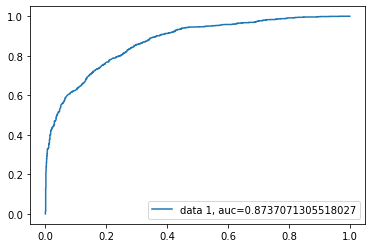

In [224]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [225]:
# Save the Performance Metrics in the Performance DataFrame
performance = performance.append({'Model': 'AdaBoost', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Generate a XGBoost Model

In [226]:
# Create the model
model = XGBClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

In [227]:
# Check the XGBoost Model Accuracy
print('XGBoost Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

XGBoost Model Accuracy:  0.7975460122699386
Precision:  0.8007604562737642
Recall:  0.7983320697498104
F1 Score:  0.7995444191343963


In [203]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1027  262]
 [ 266 1053]]


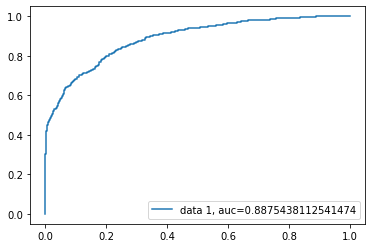

In [204]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();        

In [228]:
# Save the Performance Metrics in the Performance DataFrame
performance = performance.append({'Model': 'XGBoost', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Compare the Models

In [229]:
# Print the Performance DataFrame
performance

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.800230,0.815166,0.782411,0.798453
1,Gradient Boosting,0.796012,0.779276,0.832449,0.804985
2,Neural Network,0.796012,0.779276,0.832449,0.804985
3,AdaBoost,0.778374,0.763701,0.813495,0.787812
4,XGBoost,0.797546,0.800760,0.798332,0.799544


In [97]:
# Check for data imbalance
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [238]:
# Calculate the model with the best performance
performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.800230,0.815166,0.782411,0.798453
4,XGBoost,0.797546,0.800760,0.798332,0.799544
1,Gradient Boosting,0.796012,0.779276,0.832449,0.804985
5,Neural Network,0.788344,0.772179,0.824867,0.797654
3,AdaBoost,0.778374,0.763701,0.813495,0.787812


# Hyperparameter Tuning - Random Forest

In [120]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [239]:
np.random.seed(42)

# Create the model
model = RandomForestClassifier()

# Hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}

# Create the RandomizedSearchCV model
rf_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [241]:
# Save the best parameters
best_random = rf_random.best_estimator_

In [242]:
np.random.seed(42)

# Fit the model with the best parameters
best_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)

In [253]:
# Predict the model
y_pred = best_random.predict(X_test)

In [254]:
# Check the Random Forest Model Accuracy
print('Random Forest Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Random Forest Model Accuracy:  0.8048312883435583
Precision:  0.8045112781954887
Recall:  0.8112206216830933
F1 Score:  0.807852019630049


In [255]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1029  260]
 [ 249 1070]]


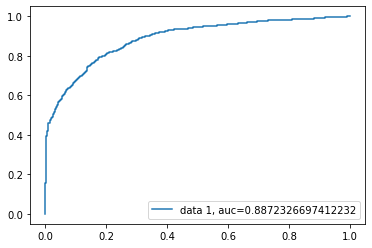

In [257]:
# ROC Curve
y_pred_proba = best_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [258]:
# Save the Performance Metrics in the Performance DataFrame
performance = performance.append({'Model': 'Random Forest (Tuned)', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [260]:
# Print the Performance DataFrame ordered by Accuracy
performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
5,Random Forest (Tuned),0.804831,0.804511,0.811221,0.807852
0,Random Forest,0.800230,0.815166,0.782411,0.798453
3,XGBoost,0.797546,0.800760,0.798332,0.799544
1,Gradient Boosting,0.796012,0.779276,0.832449,0.804985
4,Neural Network,0.788344,0.772179,0.824867,0.797654
2,AdaBoost,0.778374,0.763701,0.813495,0.787812


# Hyperparameter Tuning - XGBoost

https://www.nvidia.com/en-us/glossary/data-science/xgboost/

In [99]:
import warnings;   warnings.filterwarnings("ignore")

In [100]:
# Tunning the XGBoost Model
model = XGBClassifier(use_label_encoder =False, verbose=0, silent=True)

# Create the parameter grid
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}

# Create the GridSearchCV object
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train, y_train);

[22:31:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[22:31:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[22:31:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[22:31:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[22:31:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "s

In [101]:
# Print the best parameters
print('Best Parameters: ', grid.best_params_)
print('Best Score: ', grid.best_score_)
print('Best Estimator: ', grid.best_estimator_)
print('Best Index: ', grid.best_index_)

Best Parameters:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}
Best Score:  0.8116680361544782
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)
Best Index:  49


In [261]:
# Save the parameter from the best model
best_model = grid.best_estimator_

In [262]:
# Fit the best model
best_model.fit(X_train, y_train)

[07:05:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [263]:
# Predict the best model
y_pred = best_model.predict(X_test)

In [264]:
# Check the XGBoost (Tuned) Model Accuracy
print('XGBoost (Tuned) Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

XGBoost (Tuned) Model Accuracy:  0.8029141104294478
Precision:  0.8014981273408239
Recall:  0.8112206216830933
F1 Score:  0.8063300678221552


In [266]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1024  265]
 [ 249 1070]]


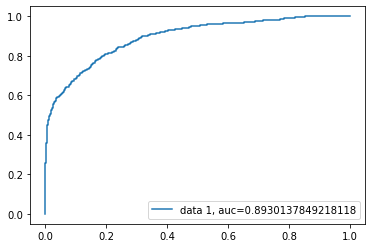

In [267]:
# ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [268]:
# Save the Performance Metrics in the Performance DataFrame
performance = performance.append({'Model': 'XGBoost (Tuned)', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [269]:
# Print the Performance DataFrame ordered by Accuracy
performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
5,Random Forest (Tuned),0.804831,0.804511,0.811221,0.807852
6,XGBoost (Tuned),0.802914,0.801498,0.811221,0.806330
0,Random Forest,0.800230,0.815166,0.782411,0.798453
3,XGBoost,0.797546,0.800760,0.798332,0.799544
1,Gradient Boosting,0.796012,0.779276,0.832449,0.804985
4,Neural Network,0.788344,0.772179,0.824867,0.797654
2,AdaBoost,0.778374,0.763701,0.813495,0.787812


# Stacking the Models

In [270]:
# Import the VotingClassifier
from sklearn.ensemble import VotingClassifier

In [271]:
# Create the VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', best_random), ('xgb', best_model)], voting='hard')

In [272]:
# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

`use_label_encoder` is deprecated in 1.7.0.


[07:09:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=50,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=800)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...one, gamma=0,
        

In [273]:
# Predict the VotingClassifier
y_pred = voting_clf.predict(X_test)

In [274]:
# Check the VotingClassifier Model Accuracy
print('VotingClassifier Model Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

VotingClassifier Model Accuracy:  0.8052147239263804
Precision:  0.8278092158447857
Recall:  0.7763457164518575
F1 Score:  0.8012519561815336


In [275]:
# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1076  213]
 [ 295 1024]]


In [277]:
# Save the Performance Metrics in the Performance DataFrame
performance = performance.append({'Model': 'VotingClassifier', 'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 'Recall': recall_score(y_test, y_pred), 'F1 Score': f1_score(y_test, y_pred)}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [278]:
# Print the Performance DataFrame ordered by Accuracy
performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
7,VotingClassifier,0.805215,0.827809,0.776346,0.801252
5,Random Forest (Tuned),0.804831,0.804511,0.811221,0.807852
6,XGBoost (Tuned),0.802914,0.801498,0.811221,0.806330
0,Random Forest,0.800230,0.815166,0.782411,0.798453
3,XGBoost,0.797546,0.800760,0.798332,0.799544
1,Gradient Boosting,0.796012,0.779276,0.832449,0.804985
4,Neural Network,0.788344,0.772179,0.824867,0.797654
2,AdaBoost,0.778374,0.763701,0.813495,0.787812


# Calculating the Submission File with the Stacked Model

In [293]:
# Predict Train.csv with VotingClassifier
y_pred = voting_clf.predict(test)

In [294]:
# Create the Submission DataFrame
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': y_pred})

In [295]:
# Read again the passengerId from the test.csv
submission = pd.read_csv('test.csv')[['PassengerId']]
submission['Transported'] = y_pred

In [296]:
# Save the Submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [298]:
# Print the first 5 rows of the Submission DataFrame
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
